***HW2 - Detecting Type 1 Diabetes***

# Theory Assignment

**A1**

For our opinion, when it comes to healthcare ML algorithms, Accuracy is more important than performance.
Because we're speaking on human lives, it is better to be more precise than, for example, when estimating house value.

האם התכוונו כאן לביצועיות של המודל? כלומר למהירות בה הוא מגיע לתוצאות?

**A2**

Too many features is often a bad thing. It may lead to Overfitting, meaning that the fitting of your parameters is too tightly to the training data. This results in model discovering random noise in the finite training set instead of the wider relationship between the features and the output variable. Consequently, the model will often perform very well on the training data but perform quite poorly on the test data.
In conclusion, overfitting may be done due to choosing all features, especially whenn taking irrelevant feature like income.

On the other hand, choosing only 2 features for such complex problem may cause under-fitting. meaning that both training accuracy and testing accuracy will be poor.


# Coding Assignment:

Import and load packages:

In [1]:
import pandas as pd 
import numpy as np
from pathlib import Path
import random
import distutils
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from Ext_Functions import str_to_bool_series

# **Q1 - Data loading and preprocessing:**

In [2]:
def nan2num(dataframe):
    """
    :param dataframe: Pandas series of features
    :return: A pandas dataframe of the dictionary c_cdf containing the "clean" features
    """
    # dataframe = pd.DataFrame(dataframe).drop(extra_feature, 1)
    c_cdf = {}
    c_cdf = dataframe
    for column in dataframe.columns:
        if column == 'Age':
            i=0
        else:
            replacing_value = np.random.choice(dataframe[column])
            c_cdf[column].replace(to_replace= np.nan , value=replacing_value, inplace = True)
    return pd.DataFrame(c_cdf)

def str_to_bool_series(s_orig):
    s = s_orig.copy()
    for index, value in s.items():
        if(value=='Yes'):
            s[index] = 1
        elif(value=='No'):
            s[index] = 0
        elif(value=='Male'):
            s[index] = 1
        elif(value == 'Female'):
            s[index] = 0
        elif(value=='Positive'):
            s[index] = 1
        elif (value == 'Negative'):
            s[index] = 0
#         elif(value==1):
#             s[index] = True
#         elif(value==0):
#             s[index] = False
    return s

Load data:

In [3]:
df_orig = pd.read_csv('HW2_data.csv')

Transfer all data to numeric values:

In [4]:
from Ext_Functions import nan2num

df = df_orig
for column in df.columns:
    df[column] = str_to_bool_series(df_orig[column])
df.tail()

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
560,54,1,1,1,1,1,0,NaN,1,1,1,1,1,1,0,0,1,0
561,32,1,0,0,0,0,0,NaN,0,0,1,1,0,0,0,1,1,0
562,61,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1
563,46,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
564,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Clean NaN's:


In [5]:
t1d_clean = nan2num(df)
t1d_clean.tail()

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
560,54,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,1,0
561,32,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
562,61,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1
563,46,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0
564,37,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Scale Age column:

In [6]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
t1d_clean[['Age']] = min_max_scaler.fit_transform(t1d_clean[['Age']])
t1d_clean

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
0,0.391892,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0
1,0.351351,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.391892,1,1,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0
3,0.581081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0.324324,0,1,1,1,1,0,0,1,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,0.513514,1,1,1,1,1,0,0,1,1,1,1,1,1,0,0,1,0
561,0.216216,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0
562,0.608108,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1
563,0.405405,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0


# **Q2 -  Split the data into Test Train 20%**

In [7]:
diagnosis = t1d_clean['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(t1d_clean, np.ravel(diagnosis), test_size=0.2,
                                                        random_state=0, stratify=np.ravel(diagnosis))

X_test

,Age,Gender,Increased Urination,Increased Thirst,Sudden Weight Loss,Weakness,Increased Hunger,Genital Thrush,Visual Blurring,Itching,Irritability,Delayed Healing,Partial Paresis,Muscle Stiffness,Hair Loss,Obesity,Diagnosis,Family History
65,0.621622,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,1,0
435,0.283784,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
71,0.418919,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
554,0.256757,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
75,0.540541,1,1,0,1,1,0,1,0,1,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,0.459459,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1
481,0.364865,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1
272,0.189189,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
552,0.148649,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Q3 - Visualization and exploration of the data**



# Distribution of the features:

In [8]:
from Ext_Functions import print_dist_features
print_dist_features(t1d_clean, X_train, X_test)

Feature            | Train % | Test % | Difference
Age                  0.43     0.43     0.0     
Gender               63.94     62.83     1.11
Increased Urination  48.23     48.67     -0.44
Increased Thirst     44.03     38.05     5.98
Sudden Weight Loss   40.93     46.02     -5.09
Weakness             56.42     60.18     -3.76
Increased Hunger     44.03     41.59     2.44
Genital Thrush       20.58     25.66     -5.08
Visual Blurring      45.8      41.59     4.21
Itching              50.22     46.02     4.2
Irritability         23.01     25.66     -2.65
Delayed Healing      46.9      43.36     3.54
Partial Paresis      42.7      42.48     0.22
Muscle Stiffness     35.62     36.28     -0.66
Hair Loss            34.29     41.59     -7.3
Obesity              17.48     14.16     3.32
Diagnosis            60.62     61.06     -0.44
Family History       50.22     52.21     -1.99


**A3 Section a**

Imbalance between train and test set could cause the learning algorithm to fail in classification of the test set.
Balance can be reached with stratification or normalization. in our case, due to the booleanic nature of the data, its better to do stratification.

# Relationship between feature and label:

These plots shows the relationsship between each feature and label. The age feature is shown in zoom-in plot because it has many details and was not clear in a small plot

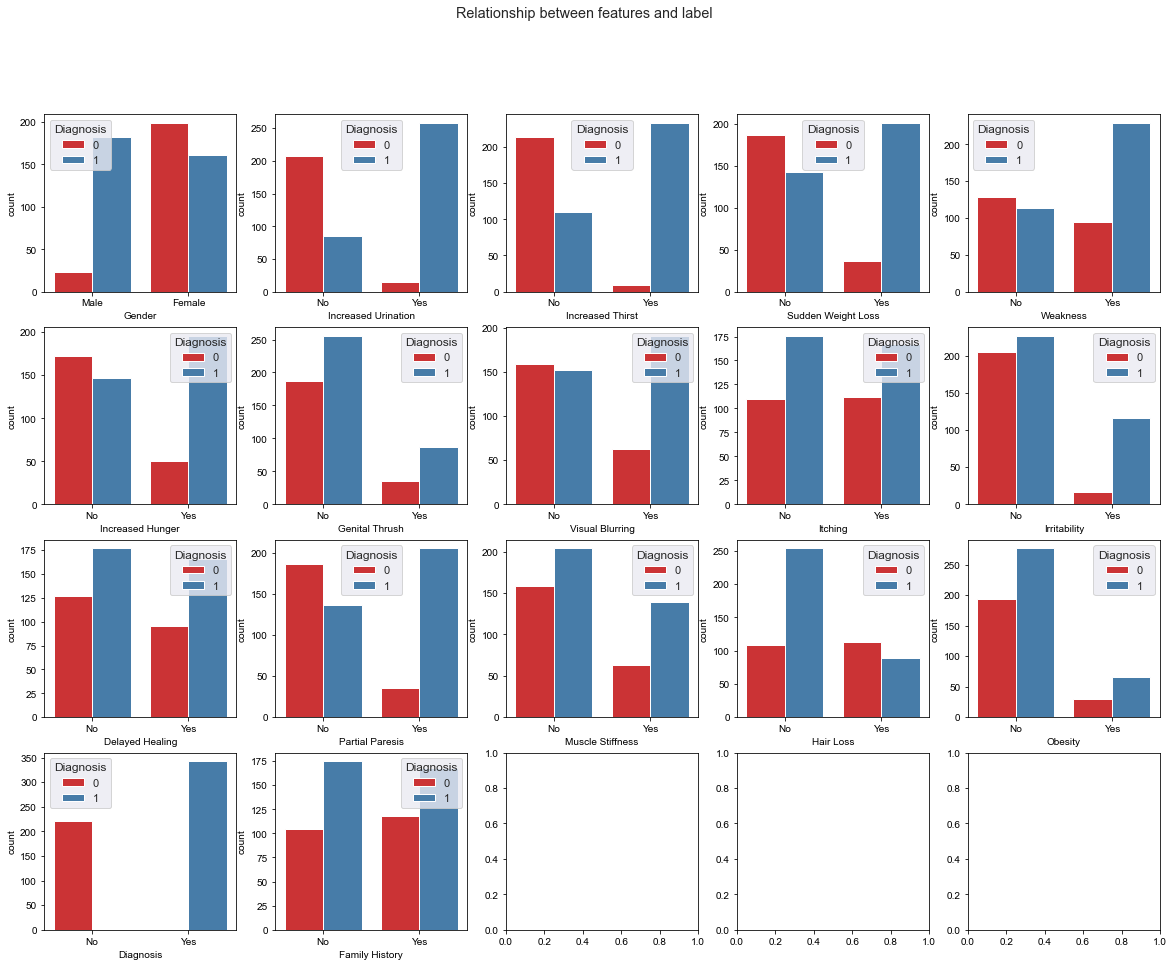

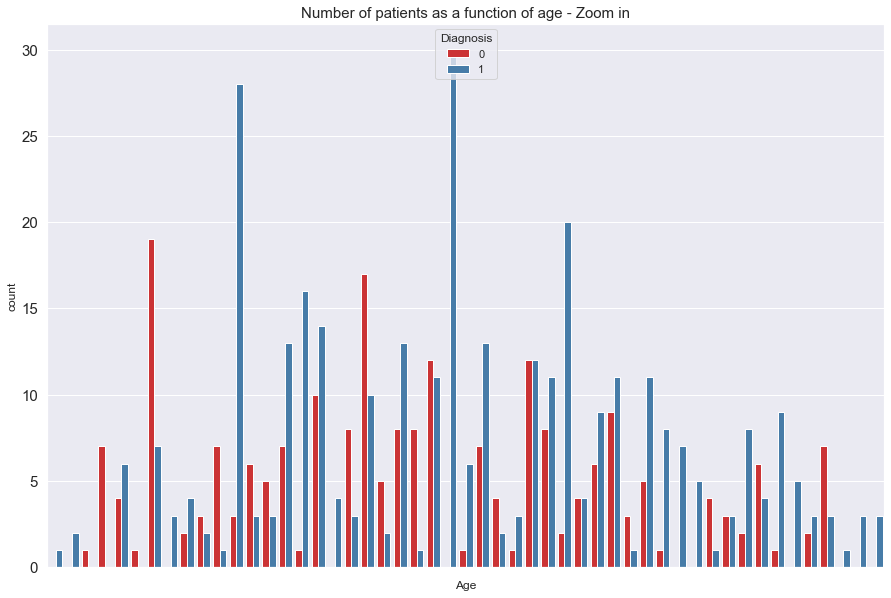

In [9]:
import seaborn as sbn
import matplotlib.ticker as ticker
from Ext_Functions import feature_corr

feature_corr(t1d_clean)

fig, axes = plt.subplots(1, 1,figsize=(15, 10) )


# Plot Age seperately:
title_text = 'Number of patients as a function of age - Zoom in'
feat_lab = sbn.countplot(ax = axes, x='Age', hue = 'Diagnosis', data = t1d_clean)
feat_lab.xaxis.set_major_locator(ticker.LinearLocator(10))
feat_lab.set_title(title_text, fontsize=15)
axes.tick_params(axis='both', which='major', labelsize=15)

Additional plots:

In [10]:
X_train = X_train.drop(columns=['Diagnosis'])
X_test = X_test.drop(columns=['Diagnosis'])

# **Q4 - One Hot Vector**

**We have already done this step - manually - in the data pre-processing stage**

In [11]:
X_train_ohv = X_train
X_test_ohv = X_test
y_train_ohv = y_train
y_test_ohv = y_test

type(X_train_ohv)

pandas.core.frame.DataFrame

Additional plots:

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import NuSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [13]:
from Ext_Functions import cv_kfold
from Ext_Functions import pred_log

**Test and Fit the models**

In [14]:
C = np.array([0.01, 0.1, 1, 5, 10, 100]) 
K = 5  
penalty = ['l1', 'l2']
val_dict = cv_kfold(X_train_ohv, y_train_ohv, C=C, penalty=penalty, K=K)
print(pd.DataFrame(val_dict))

# Insert best parameters to get the best model:

c = 5
p = 'l1'
lr_best_model = LogisticRegression(solver='saga', multi_class='ovr', penalty=p, C=c, max_iter=10000, random_state=10)
y_pred_best, _ = pred_log(lr_best_model, X_train_ohv, y_train_ohv, X_test_ohv)
y_pred_p_best, _ = pred_log(lr_best_model, X_train_ohv, y_train_ohv, X_test_ohv, flag=True)

         C penalty        Mu     Sigma       AUC     Score
0     0.01      l1  0.671948  0.004128  0.500000  0.611111
1     0.01      l2  0.480173  0.012268  0.976768  0.934066
2     0.10      l1  0.302059  0.039561  0.988636  0.934066
3     0.10      l2  0.286946  0.023385  0.985082  0.933333
4     1.00      l1  0.196794  0.039436  0.987912  0.955556
5     1.00      l2  0.203398  0.027633  0.988683  0.955556
6     5.00      l1  0.198001  0.038304  0.987140  0.955556
7     5.00      l2  0.194247  0.033042  0.987654  0.955556
8    10.00      l1  0.200807  0.039917  0.987654  0.955556
9    10.00      l2  0.196007  0.035677  0.988169  0.955556
10  100.00      l1  0.204760  0.042228  0.987654  0.955556
11  100.00      l2  0.203350  0.041281  0.987654  0.955556


In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

n_splits = K
skfold = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
svc_model = SVC(probability=True)
C = np.array([1, 100, 1000])
pipeline = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc_model)])
svm_nonlinear = GridSearchCV(estimator=pipeline, param_grid={'svm__C': C, 'svm__kernel': ['rbf', 'poly'],
                        'svm__gamma': ['auto', 'scale']}, scoring=['roc_auc'],
                        cv=skfold, refit='roc_auc', verbose=0, return_train_score=True)
svm_nonlinear.fit(X_train_ohv, y_train_ohv)

best_svm_nonlin = svm_nonlinear.best_estimator_
print('Parameters to get best svm are:', svm_nonlinear.best_params_)

Parameters to get best svm are: {'svm__C': 100, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}


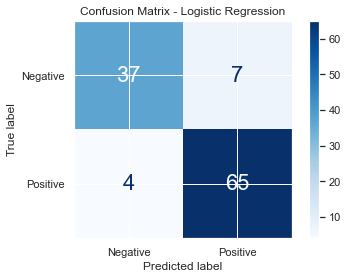

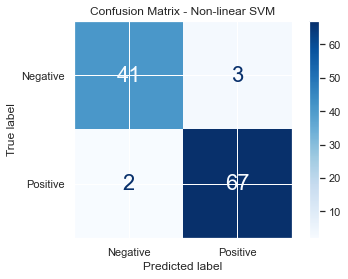

In [16]:
from sklearn.metrics import plot_confusion_matrix


disp_lr = plot_confusion_matrix(lr_best_model, X_test_ohv, y_test_ohv,
                                 display_labels=['Negative', 'Positive'],
                                 cmap=plt.cm.Blues)
disp_lr.ax_.set_title("Confusion Matrix - Logistic Regression")

disp_svm = plot_confusion_matrix(best_svm_nonlin, X_test_ohv, y_test_ohv,
                                 display_labels=['Negative', 'Positive'],
                                 cmap=plt.cm.Blues)
disp_svm.ax_.set_title("Confusion Matrix - Non-linear SVM")

plt.show()

# Q5 part b

Plot statistics for all algorithms:

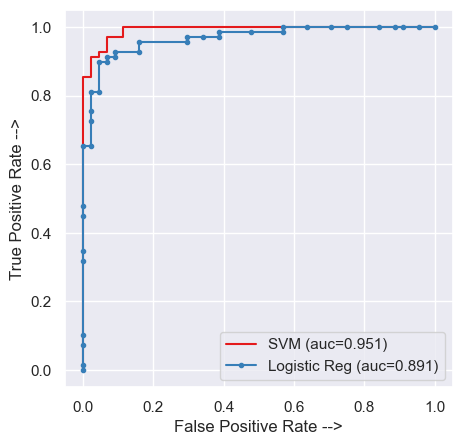

Logistic Regression Results:
Test set results:
Accuracy is: 90.27%
Precision is: 90.28%
recall is: 94.20%
F1 score is: 89.63%
AUC is: 89.15%

Train set results:
Train accuracy is: 93.81%
Train precision is: 95.56%
Train recall is: 94.16%
Train F1 score is: 93.54%
Train AUC is: 93.71%

SVM Results:
Test set results:
Accuracy is: 95.58%
Precision is: 95.71%
recall is: 97.10%
F1 score is: 95.33%
AUC is: 95.14%

Train set results:
Train accuracy is: 99.56%
Train precision is: 99.28%
Train recall is: 100.00%
Train F1 score is: 99.54%
Train AUC is: 99.44%


In [17]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from Ext_Functions import parameter_evaluation
# lr = Logistic Regression
# svm = Support Vector Machine


model_lr = lr_best_model
model_svm = best_svm_nonlin
y_pred_lr = model_lr.decision_function(X_test_ohv)
lr_fpr, lr_tpr, threshold = roc_curve(y_test_ohv, y_pred_lr)
y_pred_lr_train = (model_lr.predict(X_train_ohv)).astype("int32")
y_pred_lr_test = (model_lr.predict(X_test_ohv)).astype("int32")
auc_lr = metrics.roc_auc_score(y_test,y_pred_lr_test)


y_pred_svm = model_svm.decision_function(X_test_ohv)
svm_fpr, svm_tpr, threshold = roc_curve(y_test_ohv, y_pred_svm)
y_pred_svm_train = (model_svm.predict(X_train_ohv)).astype("int32")
y_pred_svm_test = (model_svm.predict(X_test_ohv)).astype("int32")
auc_svm = metrics.roc_auc_score(y_test,y_pred_svm_test)


plt.figure(figsize = (5,5), dpi = 100)
plt.plot(svm_fpr, svm_tpr, linestyle = '-', label = 'SVM (auc=%0.3f)' %auc_svm)
plt.plot(lr_fpr, lr_tpr,marker='.' ,label = 'Logistic Reg (auc=%0.3f)' %auc_lr)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

print('Logistic Regression Results:')
parameter_evaluation(y_test_ohv,y_train_ohv,y_pred_lr_test,y_pred_lr_train)

print()
print('SVM Results:')
parameter_evaluation(y_test_ohv,y_train_ohv,y_pred_svm_test,y_pred_svm_train)

# **Q6 - Feature importance**

Feature: 0, Score: 0.07851
Feature: 1, Score: 0.10029
Feature: 2, Score: 0.22224
Feature: 3, Score: 0.17759
Feature: 4, Score: 0.06026
Feature: 5, Score: 0.02114
Feature: 6, Score: 0.02974
Feature: 7, Score: 0.02102
Feature: 8, Score: 0.03230
Feature: 9, Score: 0.02746
Feature: 10, Score: 0.03966
Feature: 11, Score: 0.03446
Feature: 12, Score: 0.06044
Feature: 13, Score: 0.02505
Feature: 14, Score: 0.03772
Feature: 15, Score: 0.02350
Feature: 16, Score: 0.00863


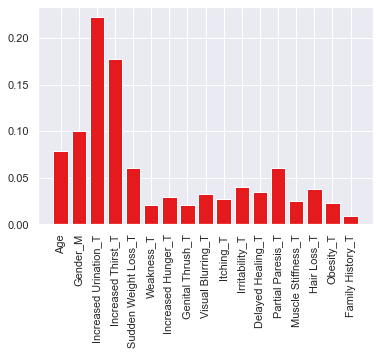

In [18]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)
# get importance
importance = model_rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
labels = ['Age','Gender_M', 'Increased Urination_T', 'Increased Thirst_T',
       'Sudden Weight Loss_T', 'Weakness_T',
        'Increased Hunger_T','Genital Thrush_T', 'Visual Blurring_T',  
        'Itching_T', 'Irritability_T','Delayed Healing_T',
        'Partial Paresis_T', 'Muscle Stiffness_T', 'Hair Loss_T',
        'Obesity_T','Family History_T']
t= np.arange(0,17)
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(t,labels, rotation='vertical')
plt.show()

As we can see, the 2 most important features are increased urination and increased thirst.

This matches up with the feature - label correlation from Q3. Looking at the graphs, we can see that these features are the most meaningful ones since they have the largest number of diagnosed patients. Also, among the patients who do have increased urination\thirst, the number of the healthy ones is the lowest in comparison to the diagnsed ones.

# Q7 - Data Separability Visualization

Section a

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
n_components = 2
pca = PCA(n_components=n_components, whiten=True)
scaler = StandardScaler()
X_train_copy = scaler.fit_transform(X_train_ohv)
X_test_copy = scaler.transform(X_test_ohv)
X_train_pca = pca.fit_transform(X_train_copy)
X_test_pca = pca.transform(X_test_copy)

In [20]:
def plt_2d_pca(X_pca,y):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, aspect='equal')
    ax.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='b')
    ax.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='r')
    ax.legend(('Negative','Positive'))
    ax.plot([0], [0], "ko")
    ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.set_xlabel('$U_1$')
    ax.set_ylabel('$U_2$')
    ax.set_title('2D PCA')

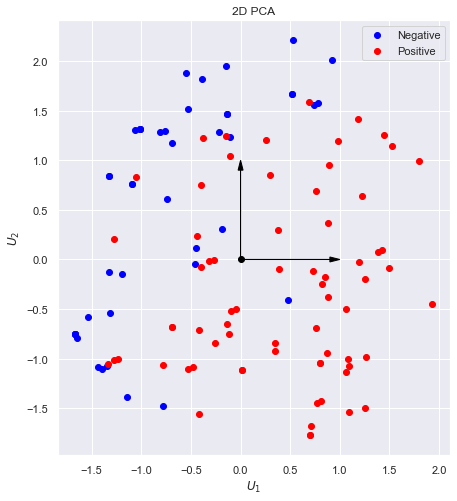

In [21]:
plt_2d_pca(X_test_pca,y_test)

Section b

As can be seen above, the data is not linearly seperable. It is possible to use a linear classifier, however the boundary condition may be misleading.

In [22]:
from sklearn.metrics import plot_confusion_matrix, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import hinge_loss
calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]


Finding the perfect parameters for the new-2D-data:

In [24]:
#Linear Regression:

X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)

C = np.array([0.01, 0.1, 1, 5, 10, 100]) 
K = 5  
penalty = ['l1', 'l2']
val_dict_pca = cv_kfold(X_train_pca, y_train_ohv, C=C, penalty=penalty, K=K)
print(pd.DataFrame(val_dict_pca))

# Insert best parameters to get the best model (PCA):

c = 1
p = 'l2'
lr_best_model_pca = LogisticRegression(solver='saga', multi_class='ovr', penalty=p, C=c, max_iter=10000, random_state=10)
y_pred_best_pca, _ = pred_log(lr_best_model_pca, X_train_pca, y_train_ohv, X_test_pca)
y_pred_prob_best_pca, _ = pred_log(lr_best_model_pca, X_train_pca, y_train_ohv, X_test_pca, flag=True)

         C penalty        Mu     Sigma       AUC     Score
0     0.01      l1  0.644279  0.013203  0.931818  0.611111
1     0.01      l2  0.481505  0.008088  0.953704  0.879121
2     0.10      l1  0.330397  0.018253  0.954218  0.890110
3     0.10      l2  0.342398  0.017225  0.957305  0.890110
4     1.00      l1  0.311047  0.029242  0.956790  0.890110
5     1.00      l2  0.311698  0.027046  0.956790  0.890110
6     5.00      l1  0.311018  0.031346  0.956790  0.890110
7     5.00      l2  0.310874  0.030644  0.956790  0.890110
8    10.00      l1  0.311055  0.031634  0.956790  0.890110
9    10.00      l2  0.310957  0.031257  0.956790  0.890110
10  100.00      l1  0.311093  0.031898  0.956790  0.890110
11  100.00      l2  0.311066  0.031860  0.956790  0.890110


In [25]:
n_splits = K
skfold = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
svc_model = SVC(probability=True)
C = np.array([1, 100, 1000])
pipeline = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc_model)])
svm_nonlinear_pca = GridSearchCV(estimator=pipeline, param_grid={'svm__C': C, 'svm__kernel': ['rbf', 'poly'],
                        'svm__gamma': ['auto', 'scale']}, scoring=['roc_auc'],
                        cv=skfold, refit='roc_auc', verbose=0, return_train_score=True)
svm_nonlinear_pca.fit(X_train_pca, y_train_ohv)

best_svm_nonlin_pca = svm_nonlinear_pca.best_estimator_
print('Parameters to get best svm are:', svm_nonlinear_pca.best_params_)

Parameters to get best svm are: {'svm__C': 100, 'svm__gamma': 'scale', 'svm__kernel': 'poly'}


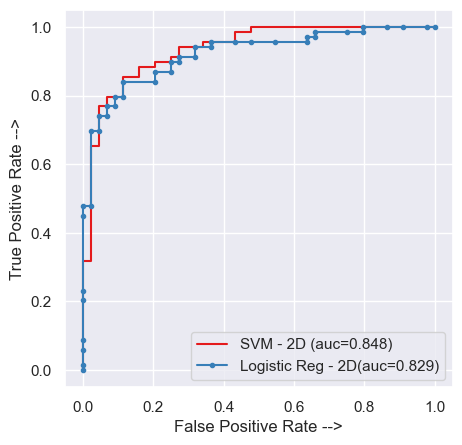

Logistic Regression Results:
Test set results:
Accuracy is: 83.19%
Precision is: 87.88%
recall is: 84.06%
F1 score is: 82.52%
AUC is: 82.94%

Train set results:
Train accuracy is: 85.84%
Train precision is: 90.08%
Train recall is: 86.13%
Train F1 score is: 85.33%
Train AUC is: 85.76%

SVM Results:
Test set results:
Accuracy is: 84.96%
Precision is: 89.39%
recall is: 85.51%
F1 score is: 84.36%
AUC is: 84.80%

Train set results:
Train accuracy is: 89.16%
Train precision is: 91.21%
Train recall is: 90.88%
Train F1 score is: 88.66%
Train AUC is: 88.70%


In [32]:
#Predict + fit for LR and SVM (PCA):

lr_best_model_pca.fit(X_train_pca, y_train)
y_pred_test_pca = lr_best_model_pca.predict(X_test_pca)

model_lr_pca = lr_best_model_pca
model_svm_pca = best_svm_nonlin_pca

y_pred_lr_pca = model_lr_pca.decision_function(X_test_pca)
lr_fpr_pca, lr_tpr_pca, threshold_pca = roc_curve(y_test_ohv, y_pred_lr_pca)
y_pred_lr_train_pca = (model_lr_pca.predict(X_train_pca)).astype("int32")
y_pred_lr_test_pca = (model_lr_pca.predict(X_test_pca)).astype("int32")
auc_lr_pca = metrics.roc_auc_score(y_test,y_pred_lr_test_pca)


y_pred_svm_pca = best_svm_nonlin_pca.decision_function(X_test_pca)
svm_fpr_pca, svm_tpr_pca, threshold_pca = roc_curve(y_test_ohv, y_pred_svm_pca)
y_pred_svm_train_pca = (best_svm_nonlin_pca.predict(X_train_pca)).astype("int32")
y_pred_svm_test_pca = (best_svm_nonlin_pca.predict(X_test_pca)).astype("int32")
auc_svm_pca = metrics.roc_auc_score(y_test,y_pred_svm_test_pca)


plt.figure(figsize = (5,5), dpi = 100)
plt.plot(svm_fpr_pca, svm_tpr_pca, linestyle = '-', label = 'SVM - 2D (auc=%0.3f)' %auc_svm_pca)
plt.plot(lr_fpr_pca, lr_tpr_pca,marker='.' ,label = 'Logistic Reg - 2D(auc=%0.3f)' %auc_lr_pca)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

print('Logistic Regression Results:')
parameter_evaluation(y_test_ohv,y_train_ohv,y_pred_lr_test_pca,y_pred_lr_train_pca)

print()
print('SVM Results:')
parameter_evaluation(y_test_ohv,y_train_ohv,y_pred_svm_test_pca,y_pred_svm_train_pca)

Section D:

In [28]:
feat_name =['Increased Urination','Increased Thirst']
X_train_2f = X_train[feat_name]
X_test_2f =  X_test[feat_name]

Again - finding the best parameters for the new data:

In [30]:
#Linear Regression:

X_train_2f = pd.DataFrame(X_train_2f)
X_test_2f = pd.DataFrame(X_test_2f)

C = np.array([0.01, 0.1, 1, 5, 10, 100]) 
K = 5  
penalty = ['l1', 'l2']
val_dict_2f = cv_kfold(X_train_2f, y_train_ohv, C=C, penalty=penalty, K=K)
print(pd.DataFrame(val_dict_2f))

# Insert best parameters to get the best model (PCA):

c = 0.1
p = 'l2'
lr_best_model_2f = LogisticRegression(solver='saga', multi_class='ovr', penalty=p, C=c, max_iter=10000, random_state=10)
y_pred_best_2f, _ = pred_log(lr_best_model_2f, X_train_2f, y_train_ohv, X_test_2f)
y_pred_prob_best_2f, _ = pred_log(lr_best_model_2f, X_train_2f, y_train_ohv, X_test_pca, flag=True)

         C penalty        Mu     Sigma       AUC     Score
0     0.01      l1  0.675207  0.006084  0.500000  0.611111
1     0.01      l2  0.547339  0.010404  0.963636  0.611111
2     0.10      l1  0.352961  0.046531  0.959091  0.934066
3     0.10      l2  0.375579  0.039221  0.963636  0.934066
4     1.00      l1  0.328868  0.064403  0.959091  0.934066
5     1.00      l2  0.330043  0.060464  0.959091  0.934066
6     5.00      l1  0.328899  0.066503  0.959091  0.934066
7     5.00      l2  0.328632  0.065453  0.959091  0.934066
8    10.00      l1  0.328949  0.066774  0.959091  0.934066
9    10.00      l2  0.328768  0.066229  0.959091  0.934066
10  100.00      l1  0.329011  0.067023  0.959091  0.934066
11  100.00      l2  0.328986  0.066962  0.959091  0.934066


In [31]:
n_splits = K
skfold = StratifiedKFold(n_splits=n_splits, random_state=10, shuffle=True)
svc_model_2f = SVC(probability=True)
C = np.array([1, 100, 1000])
pipeline = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc_model_2f)])
svm_nonlinear_2f = GridSearchCV(estimator=pipeline, param_grid={'svm__C': C, 'svm__kernel': ['rbf', 'poly'],
                        'svm__gamma': ['auto', 'scale']}, scoring=['roc_auc'],
                        cv=skfold, refit='roc_auc', verbose=0, return_train_score=True)
svm_nonlinear_2f.fit(X_train_2f, y_train_ohv)

best_svm_nonlin_2f = svm_nonlinear_2f.best_estimator_
print('Parameters to get best svm are:', svm_nonlinear_2f.best_params_)

Parameters to get best svm are: {'svm__C': 100, 'svm__gamma': 'auto', 'svm__kernel': 'poly'}


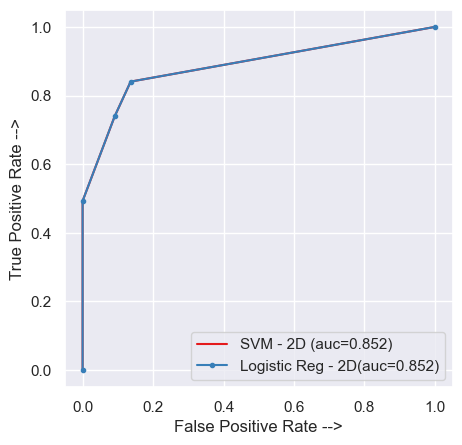

Logistic Regression Results:
Test set results:
Accuracy is: 84.96%
Precision is: 90.62%
recall is: 84.06%
F1 score is: 84.47%
AUC is: 85.21%

Train set results:
Train accuracy is: 87.39%
Train precision is: 92.89%
Train recall is: 85.77%
Train F1 score is: 87.03%
Train AUC is: 87.83%

SVM Results:
Test set results:
Accuracy is: 84.96%
Precision is: 90.62%
recall is: 84.06%
F1 score is: 84.47%
AUC is: 85.21%

Train set results:
Train accuracy is: 87.39%
Train precision is: 92.89%
Train recall is: 85.77%
Train F1 score is: 87.03%
Train AUC is: 87.83%


In [35]:
#Predict + fit for LR and SVM (PCA):

lr_best_model_2f.fit(X_train_2f, y_train)
y_pred_test_2f = lr_best_model_2f.predict(X_test_2f)

model_lr_2f = lr_best_model_2f
model_svm_2f = best_svm_nonlin_2f

y_pred_lr_2f = lr_best_model_2f.decision_function(X_test_2f)
lr_fpr_2f, lr_tpr_2f, threshold_2f = roc_curve(y_test_ohv, y_pred_lr_2f)
y_pred_lr_train_2f = (lr_best_model_2f.predict(X_train_2f)).astype("int32")
y_pred_lr_test_2f = (model_lr_2f.predict(X_test_2f)).astype("int32")
auc_lr_2f = metrics.roc_auc_score(y_test,y_pred_lr_test_2f)


y_pred_svm_2f = svm_nonlinear_2f.decision_function(X_test_2f)
svm_fpr_2f, svm_tpr_2f, threshold_2f = roc_curve(y_test_ohv, y_pred_svm_2f)
y_pred_svm_train_2f = (svm_nonlinear_2f.predict(X_train_2f)).astype("int32")
y_pred_svm_test_2f = (svm_nonlinear_2f.predict(X_test_2f)).astype("int32")
auc_svm_2f = metrics.roc_auc_score(y_test,y_pred_svm_test_2f)


plt.figure(figsize = (5,5), dpi = 100)
plt.plot(svm_fpr_2f, svm_tpr_2f, linestyle = '-', label = 'SVM - 2D (auc=%0.3f)' %auc_svm_2f)
plt.plot(lr_fpr_2f, lr_tpr_2f,marker='.' ,label = 'Logistic Reg - 2D(auc=%0.3f)' %auc_lr_2f)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

print('Logistic Regression Results:')
parameter_evaluation(y_test_ohv,y_train_ohv,y_pred_lr_test_2f,y_pred_lr_train_2f)

print()
print('SVM Results:')
parameter_evaluation(y_test_ohv,y_train_ohv,y_pred_svm_test_2f,y_pred_svm_train_2f)